
# Matplotlib tutorial


An introduction to the class Matplotlib. This notebook is based on the official documentation: https://matplotlib.org/3.1.0/index.html


To draw graphs as static images:

In [3]:
%matplotlib inline 

## Intro to pyplot

`matplotlib.pyplot` is a collection of command style functions
that make matplotlib work like MATLAB.
Each ``pyplot`` function makes
some change to a figure: e.g., creates a figure, creates a plotting area
in a figure, plots some lines in a plotting area, decorates the plot
with labels, etc.

In `matplotlib.pyplot` various states are preserved
across function calls, so that it keeps track of things like
the current figure and plotting area, and the plotting
functions are directed to the current axes (please note that "axes" here
and in most places in the documentation refers to the *axes*
`part of a figure <figure_parts>`
and not the strict mathematical term for more than one axis).

<div class="alert alert-info"><h4>Note</h4><p>the pyplot API is generally less-flexible than the object-oriented API.
   Most of the function calls you see here can also be called as methods
   from an ``Axes`` object. We recommend browsing the tutorials and
   examples to see how this works.</p></div>


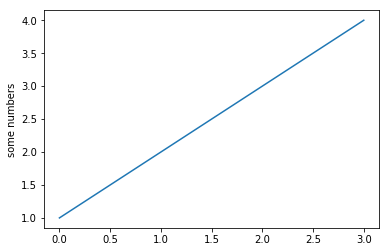

In [4]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

`~matplotlib.pyplot.plot` is a versatile command, and will take
an arbitrary number of arguments.  For example, to plot x versus y,
you can issue the command:



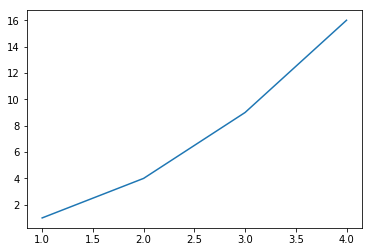

In [5]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

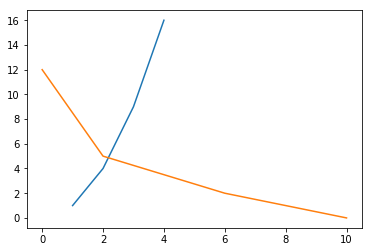

In [6]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16],[0,2,6,10],[12,5,2,0])

## Formatting the style of your plot

For every x, y pair of arguments, there is an optional third argument
which is the format string that indicates the color and line type of
the plot.  The letters and symbols of the format string are from
MATLAB, and you concatenate a color string with a line style string.
The default format string is 'b-', which is a solid blue line.  For
example, to plot the above with red circles, you would issue



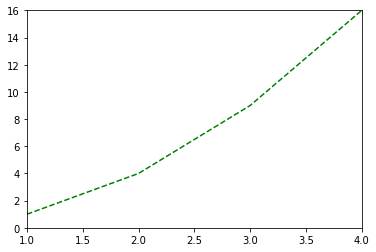

In [11]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'g--')
plt.axis([1, 4, 0, 16])
plt.show()

See the `~matplotlib.pyplot.plot` documentation for a complete
list of line styles and format strings.  The
`~matplotlib.pyplot.axis` command in the example above takes a
list of ``[xmin, xmax, ymin, ymax]`` and specifies the viewport of the
axes.

If matplotlib were limited to working with lists, it would be fairly
useless for numeric processing.  Generally, you will use `numpy
<http://www.numpy.org>`_ arrays.  In fact, all sequences are
converted to numpy arrays internally.  The example below illustrates a
plotting several lines with different format styles in one command
using arrays.



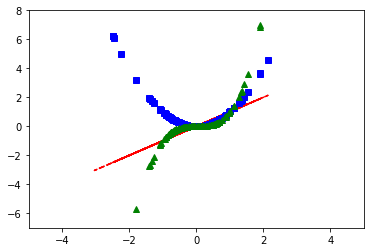

In [15]:
import numpy as np

t = np.random.randn(110)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.axis([-5,5,-7,8])
plt.show()

In [16]:
t

array([ 0.06684578,  1.33165038,  0.887296  ,  1.35189223, -1.08624807,
        0.00714761, -0.67389977,  0.16541344,  0.57695064,  0.14807097,
       -0.30553606, -0.84390737, -0.2870046 ,  0.22210907,  1.01563716,
       -0.39147549, -0.43377429,  0.43434645, -0.94834746,  0.51995776,
        0.98045959,  0.13527061,  0.4626886 , -0.64523209, -3.04264287,
       -0.74826492, -0.34967742, -0.16246368, -0.46598773, -1.0769499 ,
       -2.4728212 , -0.90319146,  1.53315969,  0.54699747, -0.51591281,
        0.60223568, -1.05297854, -0.60789038, -0.08944912, -0.07779049,
       -0.96765352,  1.91321478,  0.87401477,  0.67739484,  0.4839092 ,
        1.43433185, -0.65934476,  0.45303818, -1.78822005, -0.91116802,
        0.30423006,  0.6292138 ,  0.16770001, -0.13881874,  0.84983517,
        2.13367073, -0.27790139, -0.82301806, -0.30615138,  0.69139708,
       -0.3774418 , -0.66132758, -0.29177535, -0.89756734, -1.27725857,
       -0.66607246, -0.07527215, -1.33101776, -0.05499752, -0.22


## Plotting with keyword strings

There are some instances where you have data in a format that lets you
access particular variables with strings. For example, with
`numpy.recarray` or `pandas.DataFrame`.

Matplotlib allows you provide such an object with
the ``data`` keyword argument. If provided, then you may generate plots with
the strings corresponding to these variables.



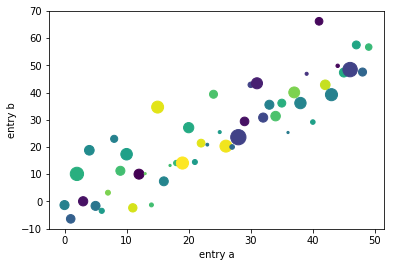

In [17]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()


## Plotting with categorical variables

It is also possible to create a plot using categorical variables.
Matplotlib allows you to pass categorical variables directly to
many plotting functions. For example:



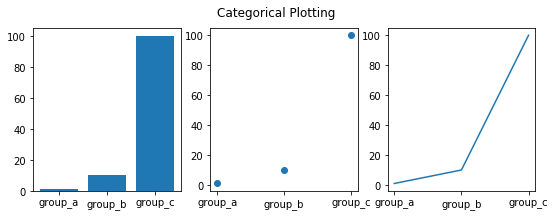

In [19]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

`plt.subplot(131)` is called with 3-digit integer (or three separate integers describing the position of the subplot). If the three integers are _nrows_, _ncols_, and _index_ in order, the subplot will take the index position on a grid with nrows rows and ncols columns. index starts at 1 in the upper left corner and increases to the right.

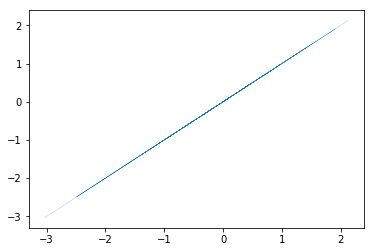

In [22]:
plt.plot(t, t, lw=0.1)


## Controlling line properties


Lines have many attributes that you can set: linewidth, dash style,
antialiased, etc; see `matplotlib.lines.Line2D`.  There are
several ways to set line properties

* Use keyword args::

      plt.plot(x, y, linewidth=2.0)

* Use the `~matplotlib.pyplot.setp` command.  The example below
  uses a MATLAB-style command to set multiple properties
  on a list of lines.  ``setp`` works transparently with a list of objects
  or a single object.  You can either use python keyword arguments or
  MATLAB-style string/value pairs::

      lines = plt.plot(x1, y1, x2, y2)
      # use keyword args
      plt.setp(lines, color='r', linewidth=2.0)
      # or MATLAB style string value pairs
      plt.setp(lines, 'color', 'r', 'linewidth', 2.0)


Here are the available `~matplotlib.lines.Line2D` properties:
https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html

To get a list of settable line properties, call the
`~matplotlib.pyplot.setp` function with a line or lines
as argument

.. sourcecode:: ipython

    In [69]: lines = plt.plot([1, 2, 3])

    In [70]: plt.setp(lines)
      alpha: float
      animated: [True | False]
      antialiased or aa: [True | False]
      ...snip

In [ ]:
plt.plot(t, t, linewidth=2.0)

[None, None, None]

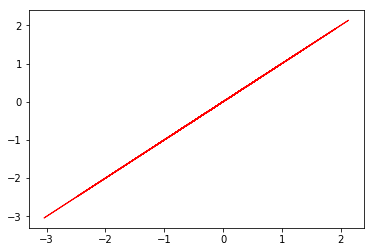

In [26]:
line = plt.plot(t, t)
plt.setp(line, color='r', linewidth=1, antialiased=True)

## Working with multiple figures and axes


MATLAB, and `~matplotlib.pyplot`, have the concept of the current
figure and the current axes.  All plotting commands apply to the
current axes.  The function `~matplotlib.pyplot.gca` returns the
current axes (a `matplotlib.axes.Axes` instance), and
`~matplotlib.pyplot.gcf` returns the current figure
(`matplotlib.figure.Figure` instance). Normally, you don't have
to worry about this, because it is all taken care of behind the
scenes.  Below is a script to create two subplots.

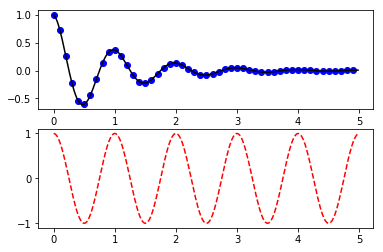

In [27]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

The :func:`~matplotlib.pyplot.figure` command here is optional because
``figure(1)`` will be created by default, just as a ``subplot(111)``
will be created by default if you don't manually specify any axes.  The
:func:`~matplotlib.pyplot.subplot` command specifies ``numrows,
numcols, plot_number`` where ``plot_number`` ranges from 1 to
``numrows*numcols``.  The commas in the ``subplot`` command are
optional if ``numrows*numcols<10``.  So ``subplot(211)`` is identical
to ``subplot(2, 1, 1)``.

You can create multiple figures by using multiple
:func:`~matplotlib.pyplot.figure` calls with an increasing figure
number.  Of course, each figure can contain as many axes and subplots
as your heart desires::

    import matplotlib.pyplot as plt
    plt.figure(1)                # the first figure
    plt.subplot(211)             # the first subplot in the first figure
    plt.plot([1, 2, 3])
    plt.subplot(212)             # the second subplot in the first figure
    plt.plot([4, 5, 6])


    plt.figure(2)                # a second figure
    plt.plot([4, 5, 6])          # creates a subplot(111) by default

   
    plt.title('Easy as 1, 2, 3') # subplot 211 title



If you are making lots of figures, you need to be aware of one
more thing: the memory required for a figure is not completely
released until the figure is explicitly closed with
`~matplotlib.pyplot.close`.  Deleting all references to the
figure, and/or using the window manager to kill the window in which
the figure appears on the screen, is not enough, because pyplot
maintains internal references until `~matplotlib.pyplot.close`
is called.

Text(0.5,1,'Easy as 1, 2, 3')

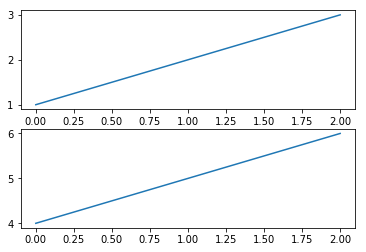

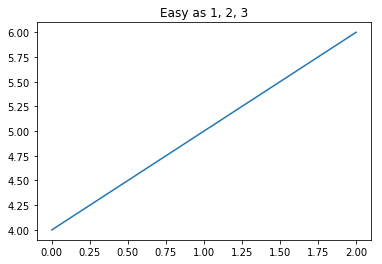

In [28]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])

plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.title('Easy as 1, 2, 3') # subplot 211 title

## Working with text

The `~matplotlib.pyplot.text` command can be used to add text in
an arbitrary location, and the `~matplotlib.pyplot.xlabel`,
`~matplotlib.pyplot.ylabel` and `~matplotlib.pyplot.title`
are used to add text in the indicated locations (see `/tutorials/text/text_intro`
for a more detailed example)

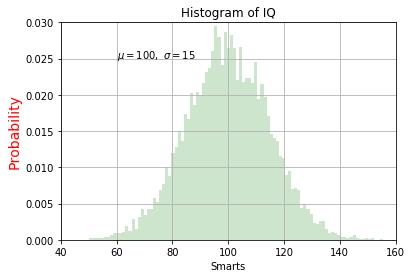

In [44]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 100, (50,160), density=1, facecolor='g', alpha=0.2)

plt.xlabel('Smarts')
plt.ylabel('Probability',fontsize=14, color='red')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

## Using mathematical expressions in text


matplotlib accepts TeX equation expressions in any text expression.
For example to write the expression $\sigma_i=15$ in the title,
you can write a TeX expression surrounded by dollar signs::

    plt.title(r'$\sigma_i=15$')

The ``r`` preceding the title string is important -- it signifies
that the string is a *raw* string and not to treat backslashes as
python escapes.  matplotlib has a built-in TeX expression parser and
layout engine, and ships its own math fonts -- for details see
`/tutorials/text/mathtext`.  Thus you can use mathematical text across platforms
without requiring a TeX installation.  For those who have LaTeX and
dvipng installed, you can also use LaTeX to format your text and
incorporate the output directly into your display figures or saved
postscript -- see :doc:`/tutorials/text/usetex`.


Annotating text
---------------

The uses of the basic `~matplotlib.pyplot.text` command above
place text at an arbitrary position on the Axes.  A common use for
text is to annotate some feature of the plot, and the
:func:`~matplotlib.pyplot.annotate` method provides helper
functionality to make annotations easy.  In an annotation, there are
two points to consider: the location being annotated represented by
the argument ``xy`` and the location of the text ``xytext``.  Both of
these arguments are ``(x,y)`` tuples.



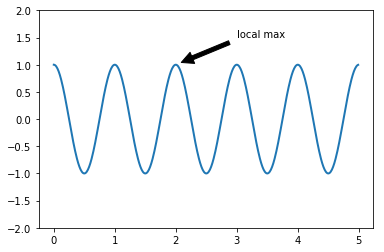

In [53]:
x = np.arange(0.0, 5.0, 0.01)
y = np.cos(2*np.pi*x)
line, = plt.plot(x, y, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.09),
             )

plt.ylim(-2, 2)
plt.show()

In this basic example, both the ``xy`` (arrow tip) and ``xytext``
locations (text location) are in data coordinates.  There are a
variety of other coordinate systems one can choose -- see
`annotations-tutorial` and `plotting-guide-annotation` for
details.  More examples can be found in
:doc:`/gallery/text_labels_and_annotations/annotation_demo`.


## Logarithmic and other nonlinear axes

`matplotlib.pyplot` supports not only linear axis scales, but also
logarithmic and logit scales. This is commonly used if data spans many orders
of magnitude. Changing the scale of an axis is easy:

    plt.xscale('log')

An example of four plots with the same data and different scales for the y axis
is shown below.



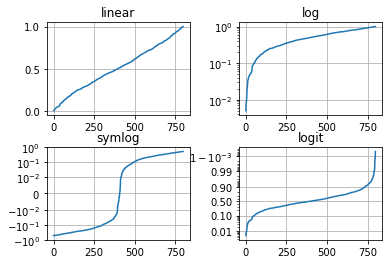

In [60]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(hspace=0.35, wspace=0.35)

plt.show()

In [65]:
np.random.RandomState?

## 3D plot

In [66]:
plt.gca?

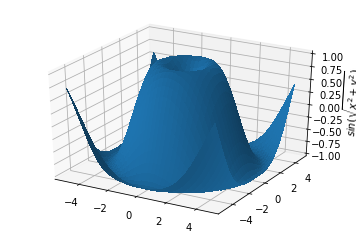

In [69]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.set_zlabel(r'$sin(\sqrt{x^2+y^2})$')

plt.show()

**Note:** np.meshgrid(x,y) generates all combinations of x and y.

In [73]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 6, 3, 4])

In [74]:
np.meshgrid(x,y)

[array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]), array([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [6, 6, 6, 6, 6],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]])]

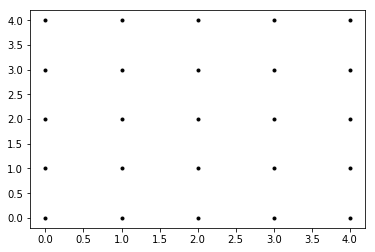

In [72]:
x, y = np.meshgrid(x, y)

plt.plot(x, y, marker='.', color='k', linestyle='none')